In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
month = 10
day = 10
timestep = 6
Data = pd.read_csv("df"+str(month)+str(day)+"R3-T"+str(timestep)+".csv")

In [64]:
Data=Data.head(138)

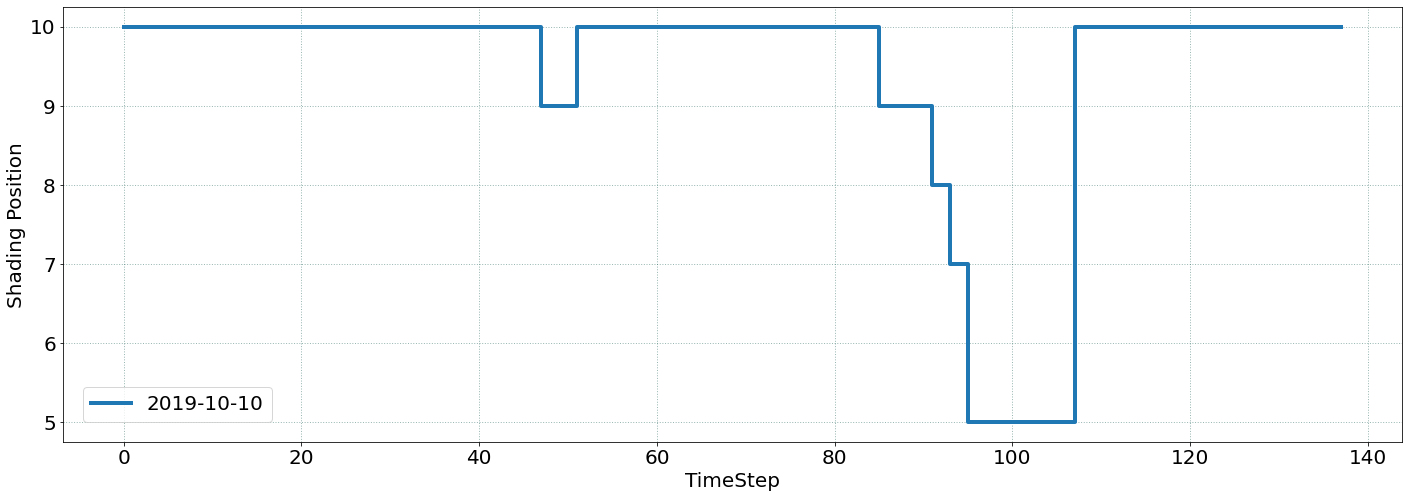

In [65]:
List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
column_names = List
Data['OCR%']= Data[column_names].sum(axis=1)
OCR = Data["OCR%"]

plt.figure(figsize=(24,8))
plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('TimeStep', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('Shading Position', fontsize=20)
plt.plot(OCR, lw=4 , label="2019-"+str(month)+"-"+str(day), drawstyle='steps', markersize=21)
plt.legend(loc='lower left', borderaxespad=1,fontsize=20)
plt.savefig("2019-"+str(month)+"-"+str(day)+'Shading position_daily.png', dpi = 300)

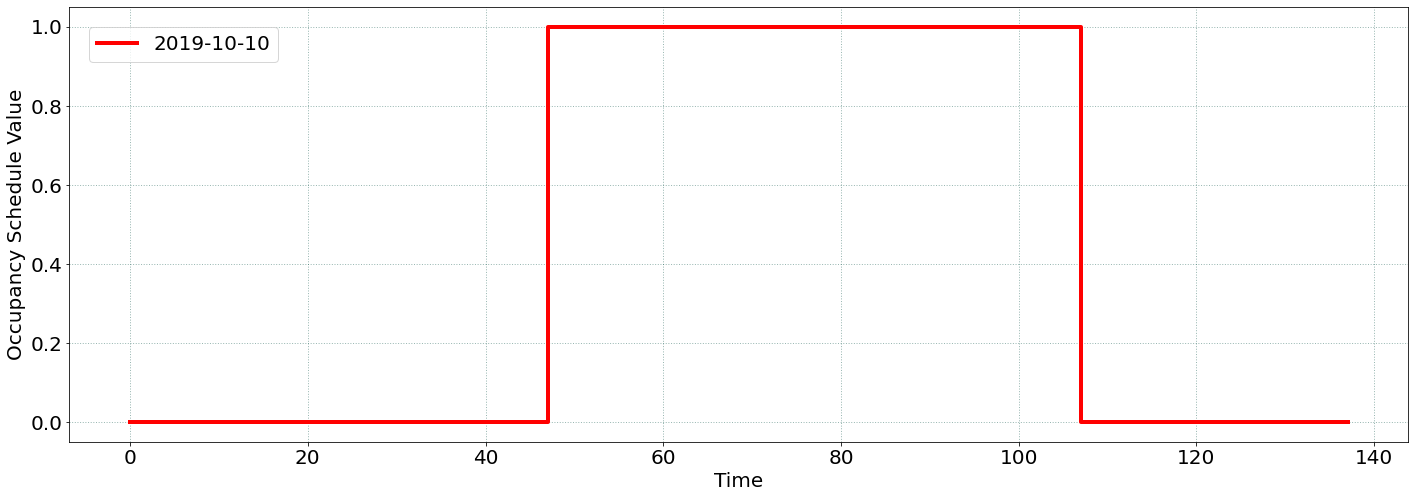

In [66]:
List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
column_names = List
#Data['OCR%']= Data[column_names].sum(axis=1)
OCC = Data["office work occ,Schedule Value"]

plt.figure(figsize=(24,8))
plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('Occupancy Schedule Value', fontsize=20)
plt.plot(OCC, lw=4 , label="2019-"+str(month)+"-"+str(day), drawstyle='steps', markersize=21, c="r")
plt.legend(loc='upper left', borderaxespad=1,fontsize=20)
plt.savefig("2019-"+str(month)+"-"+str(day)+'Occupancy_schedule_Daily.png', dpi = 300)

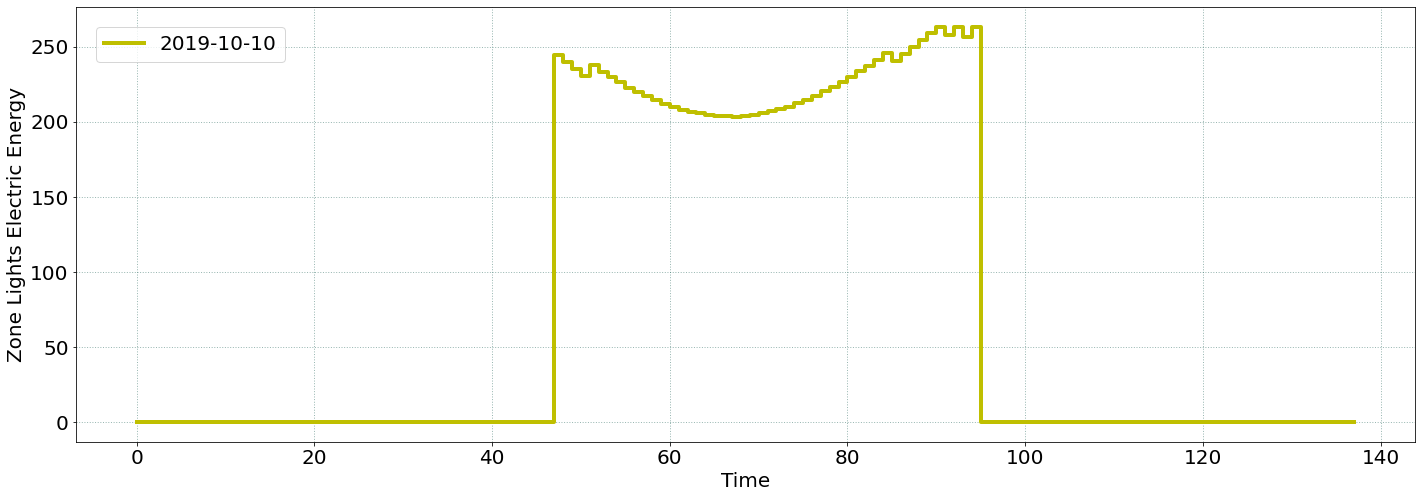

In [67]:
light = Data["thermal zone 1,Zone Lights Electric Power"]
plt.figure(figsize=(24,8))
plt.grid(True, color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('Zone Lights Electric Energy', fontsize=20)
plt.plot(light, lw=4 , label="2019-"+str(month)+"-"+str(day), drawstyle='steps', markersize=21, c="y")
plt.legend(loc='upper left', borderaxespad=1,fontsize=20)
plt.savefig("2019-"+str(month)+"-"+str(day)+'Light_energy_Daily.png', dpi = 300)

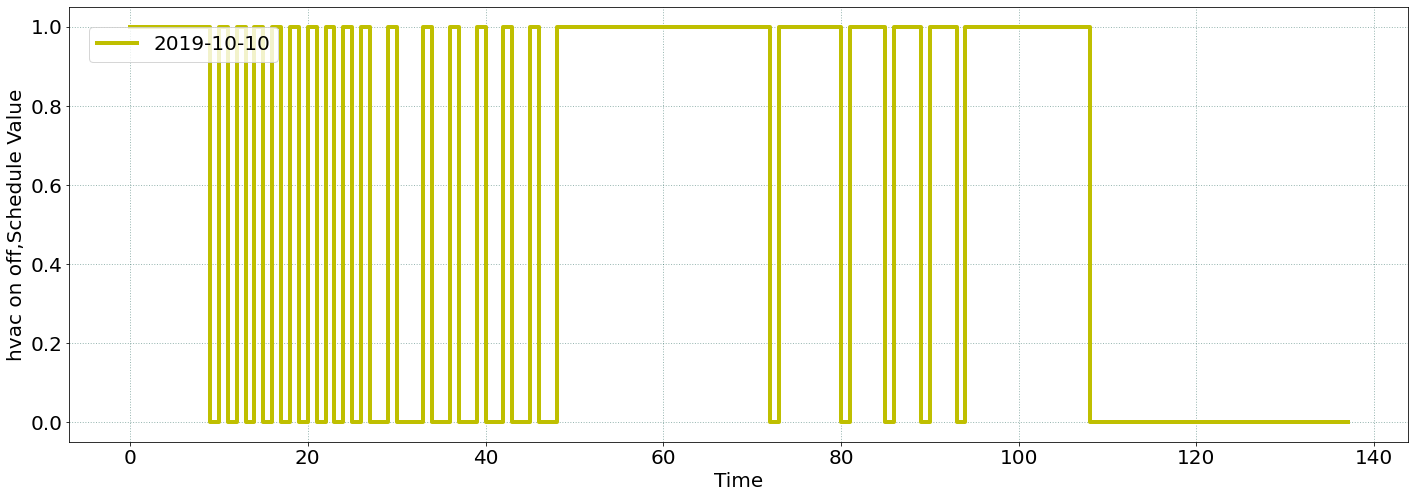

In [68]:
light = Data["hvac on off,Schedule Value"]
plt.figure(figsize=(24,8))
plt.grid(True, color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('hvac on off,Schedule Value', fontsize=20)
plt.plot(light, lw=4 , label="2019-"+str(month)+"-"+str(day), drawstyle='steps', markersize=21, c="y")
plt.legend(loc='upper left', borderaxespad=1,fontsize=20)
plt.savefig("2019-"+str(month)+"-"+str(day)+'hvac on off,Schedule Value_Daily.png', dpi = 300)

In [69]:
Data = pd.DataFrame()
for i in range (1,8):

    Data1 = pd.read_csv("df"+str(month*100+i)+"R3-T"+str(timestep)+".csv")
    if timestep==6:
        
        Data1=Data1.head(138)
    Data = Data.append(Data1)
    

In [53]:
Data['new_datetime'] = [pd.to_datetime(d) for d in Data['Unnamed: 0']]
Data['new_date']= [d.date() for d in Data['new_datetime']]
Data['new_time']= [d.time() for d in Data['new_datetime']]

No handles with labels found to put in legend.


([], <a list of 0 Text major ticklabel objects>)

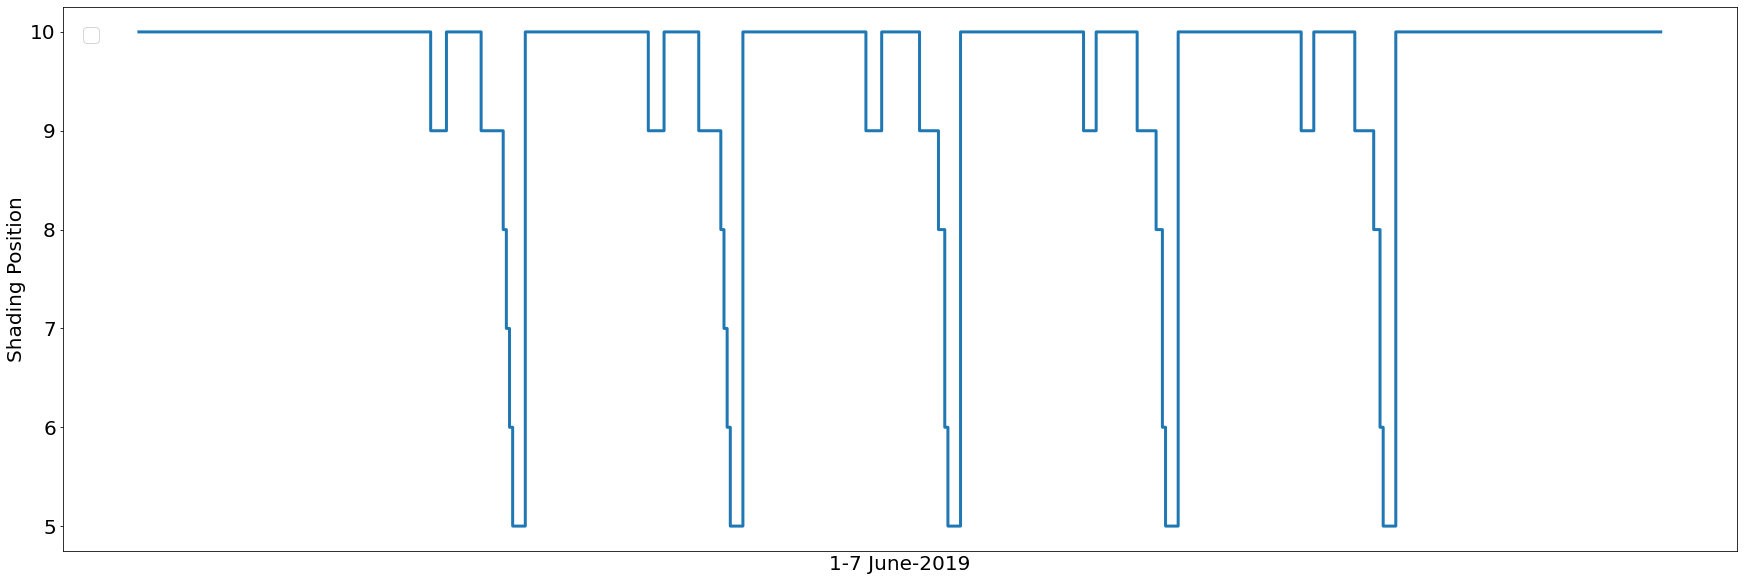

In [54]:
List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
column_names = List
Data['OCR1%']= Data[column_names].sum(axis=1)
OCR = Data["OCR1%"]

plt.figure(figsize=(30,10))
#plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('1-7 June-2019', fontsize=20)
plt.rc('xtick', labelsize=0) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('Shading Position', fontsize=20)
plt.plot(Data["Unnamed: 0"],OCR, lw=3 , drawstyle='steps')
#plt.plot(df_HVAC , lw =2 , label= 'Zone Temp' )
#plt.plot(Actual_temp["Actual weather"] , lw =2 , label= 'temp measured' )
plt.legend(loc='upper left', borderaxespad=1,fontsize=20)
#plt.xlim(xmin=0)
plt.xticks([])

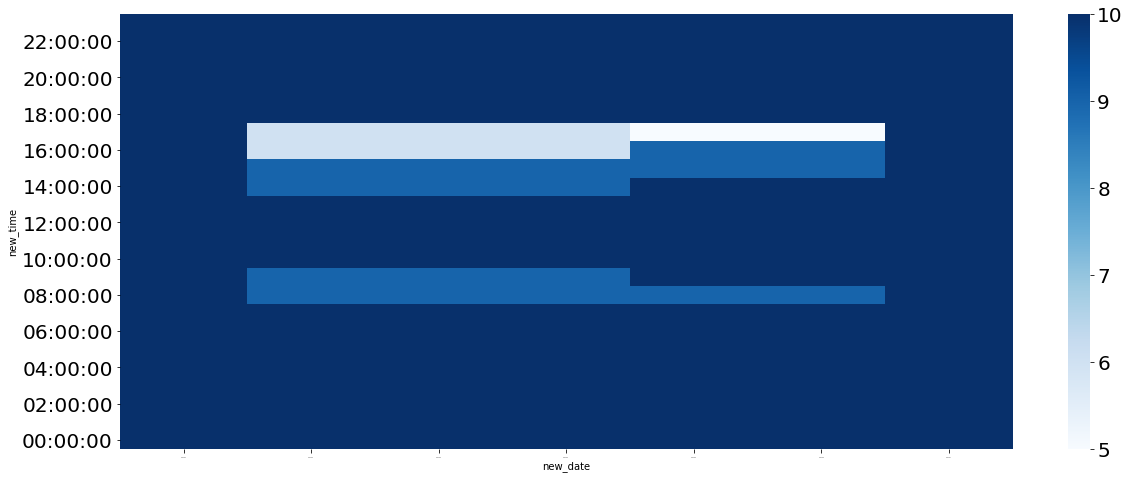

In [30]:
restr_data=Data.groupby(['new_time','new_date']).mean()['OCR1%'].unstack()

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(restr_data, cmap="Blues")
ax.invert_yaxis()

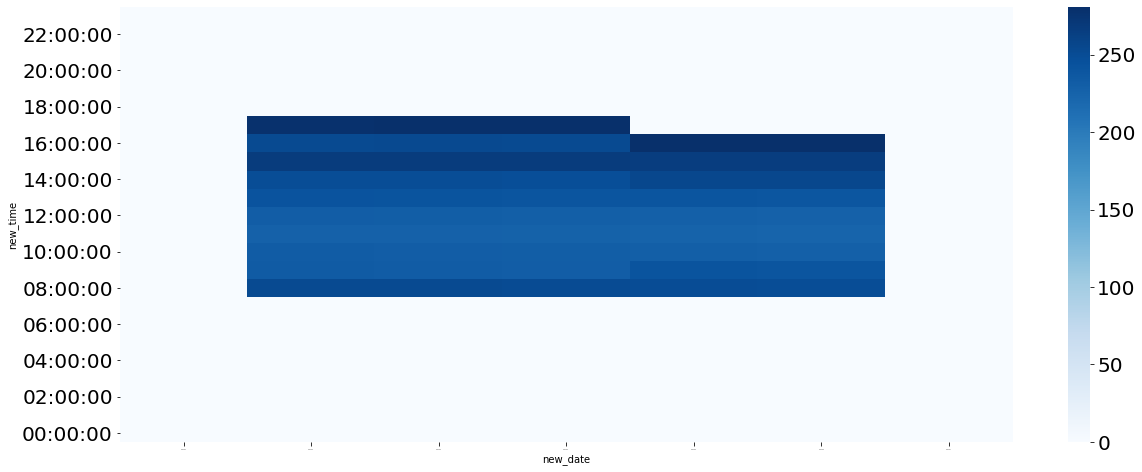

In [31]:
restr_data=Data.groupby(['new_time','new_date']).mean()['thermal zone 1,Zone Lights Electric Power'].unstack()

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(restr_data, cmap="Blues")
ax.invert_yaxis()

In [143]:
Data_year = pd.DataFrame()
for m in range (1,13):
    if m in [1,3,5,7,8,10,12]:
        L= 31
        
    elif m in  [4,6,9,11]:
        L=30
        
    else:
        L = 28
        
    for i in range (1,L+1):
        Data_y = pd.read_csv("df"+str(100*m+i)+"R3-T"+str(timestep)+".csv")
        Data_year = Data_year.append(Data_y)
        
Data_year['new_datetime'] = [pd.to_datetime(d) for d in Data_year['Unnamed: 0']]
Data_year['new_date']= [d.date() for d in Data_year['new_datetime']]
Data_year['new_time']= [d.time() for d in Data_year['new_datetime']]


List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
column_names = List

Data_year['OCR1%']= Data_year[column_names].sum(axis=1)
OCR = Data_year["OCR1%"]
Data_year.loc[Data_year["hour"]==23,"OCR1%"] = 10


In [242]:
help(df.date)

NameError: name 'df' is not defined

In [118]:
Data_year.to_csv("RollerShade_idf_year_10min.csv")

In [119]:
Lights_Electric_Energy = Data_year["thermal zone 1,Zone Lights Electric Energy"].sum()

In [120]:
Lights_Electric_Energy = Lights_Electric_Energy/(3.6*10**6) #kwh

In [121]:
Lights_Electric_Energy 

518.1843252031275

In [122]:
districtcooling = Data_year["districtcooling:hvac,Meter"].sum()/(3.6*10**6) #kWh
districtheating = Data_year["districtheating:hvac,Meter"].sum()/(3.6*10**6) #kWh

In [123]:
districtcooling

1246.4836469707143

In [125]:
districtheating

9.67026325356412

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winte

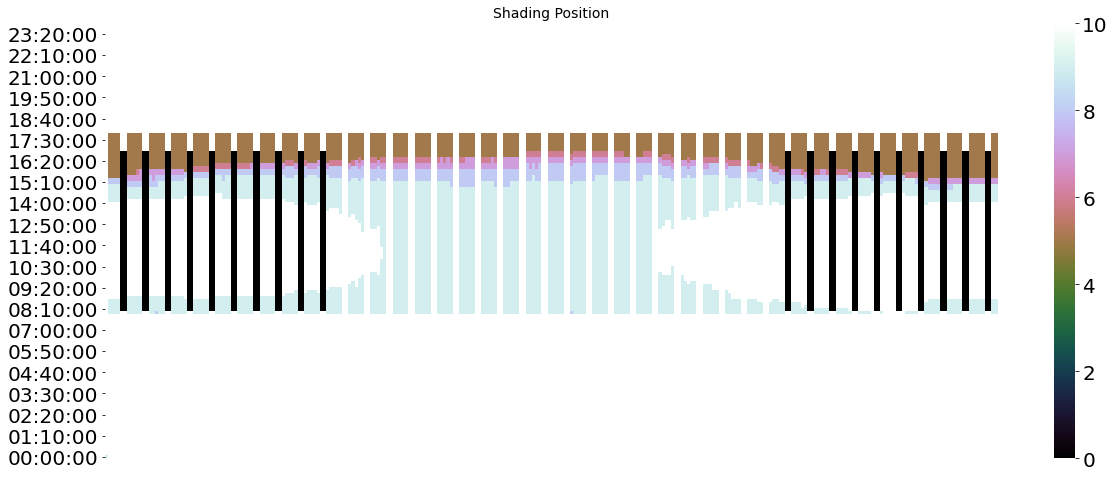

In [250]:
SP_name = "Shading Position1"
restr_data=Data_year.groupby(['new_time','new_date']).mean()['OCR1%'].unstack()

f, ax = plt.subplots(figsize=(20, 8) ,clear=True)
ax = sns.heatmap(restr_data, cmap="cubehelix", vmin=0, vmax=10 , xticklabels=False)
ax.invert_yaxis()
ax.set_title(SP_name, fontsize=14, )
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xlim(0, 144 ,)
ax.set_ylim()
plt.savefig(SP_name+'.png', dpi = 300)

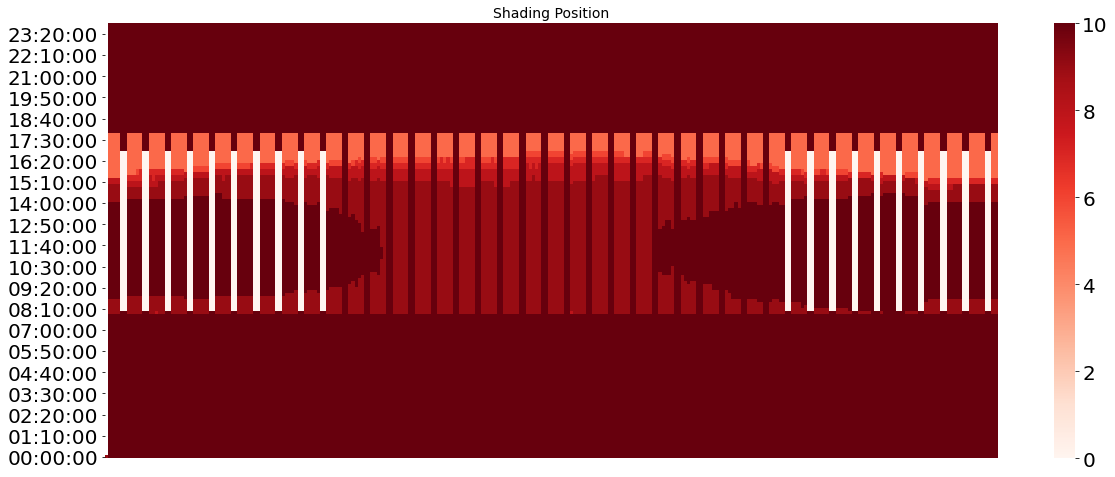

In [255]:
SP_name = "Shading Position"
restr_data=Data_year.groupby(['new_time','new_date']).mean()['OCR1%'].unstack()

f, ax = plt.subplots(figsize=(20, 8) ,clear=True)
ax = sns.heatmap(restr_data, cmap="Reds", vmin=0, vmax=10 , xticklabels=False)
ax.invert_yaxis()
ax.set_title(SP_name, fontsize=14, )
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xlim(0, 144 ,)
ax.set_ylim()
plt.savefig(SP_name+'2.png', dpi = 300)

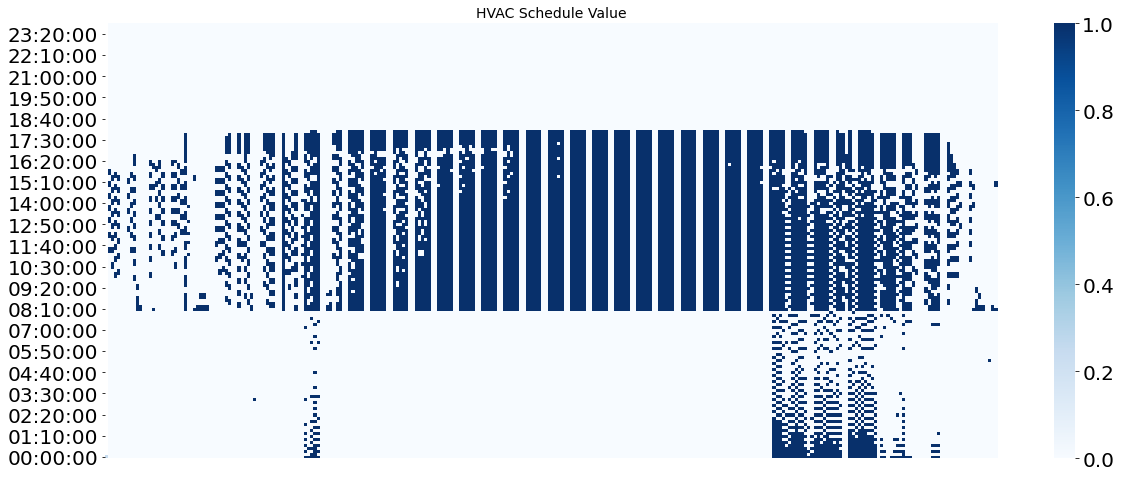

In [271]:
SP_name = "HVAC Schedule Value"
restr_data=Data_year.groupby(['new_time','new_date']).mean()['hvac on off,Schedule Value'].unstack()

f, ax = plt.subplots(figsize=(20, 8) ,clear=True)
ax = sns.heatmap(restr_data, cmap="Blues", vmin=0, vmax=1 , xticklabels=False)
ax.invert_yaxis()
ax.set_title(SP_name, fontsize=14, )
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xlim(0, 144 ,)
ax.set_ylim()
plt.savefig(SP_name+'.png', dpi = 300)

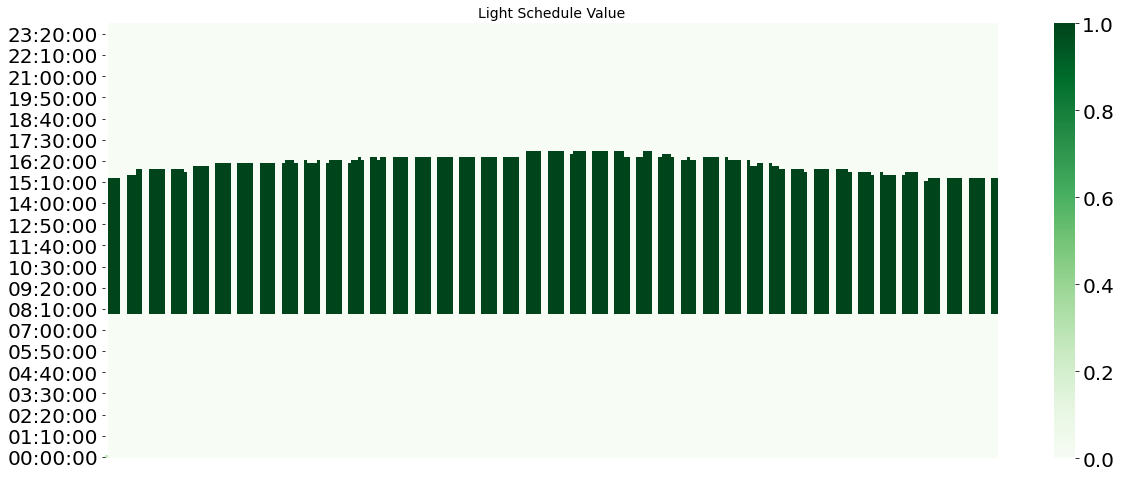

In [274]:
SP_name = "Light Schedule Value"
restr_data=Data_year.groupby(['new_time','new_date']).mean()['light file 10,Schedule Value'].unstack()

f, ax = plt.subplots(figsize=(20, 8) ,clear=True)
ax = sns.heatmap(restr_data, cmap="Greens", vmin=0, vmax=1 , xticklabels=False)
ax.invert_yaxis()
ax.set_title(SP_name, fontsize=14, )
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xlim(0, 144 ,)
ax.set_ylim()
plt.savefig(SP_name+'.png', dpi = 300)

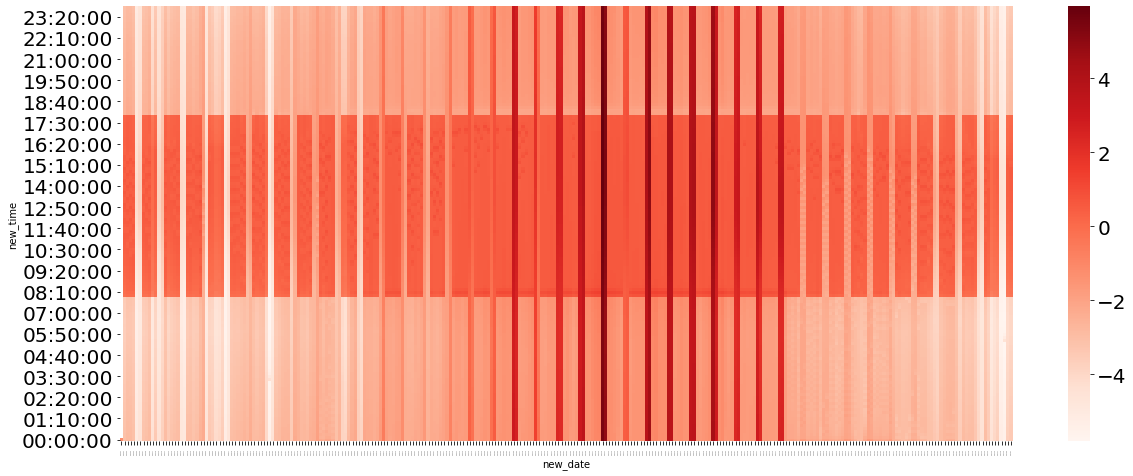

In [257]:
restr_data=Data_year.groupby(['new_time','new_date']).mean()['thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,Zone Thermal Comfort Fanger Model PMV'].unstack()

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(restr_data, cmap="Reds")
ax.invert_yaxis()

In [96]:
import numpy as np
schedule_y = pd.read_csv("schedule101R3-T6.csv")
for m in range (1,13):
    for i in range (1,28):
        schedule_y = schedule_y.replace({'0':np.nan, 0:np.nan})
        schedule_y.update(pd.read_csv("schedule"+str(100*m+i)+"R3-T6.csv"), overwrite= False)

C:\Users\Morteza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (12,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Morteza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (13,14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [97]:
schedule_y['new_datetime'] = [pd.to_datetime(d) for d in schedule_y['Unnamed: 0']]
schedule_y['new_date']= [d.date() for d in schedule_y['new_datetime']]
schedule_y['new_time']= [d.time() for d in schedule_y['new_datetime']]

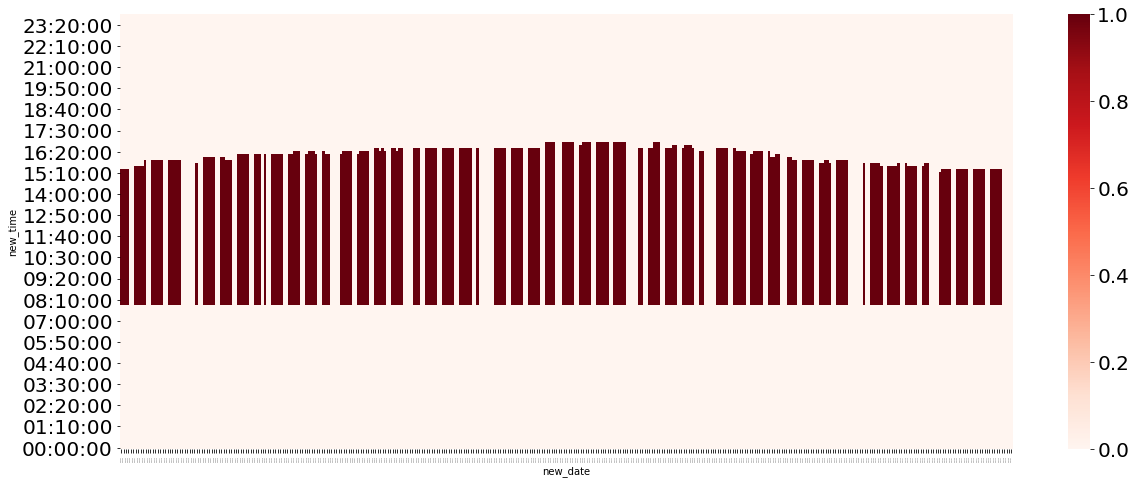

In [98]:
restr_data=schedule_y.groupby(['new_time','new_date']).mean()['light'].unstack()

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(restr_data, cmap="Reds")
ax.invert_yaxis()

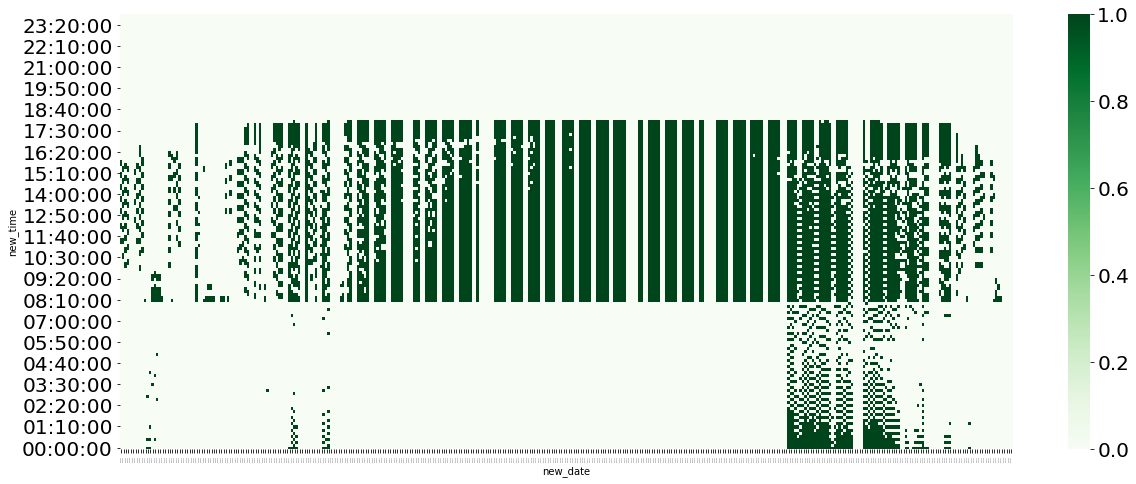

In [99]:
restr_data=schedule_y.groupby(['new_time','new_date']).mean()['HVAC'].unstack()

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(restr_data, cmap="Greens")
ax.invert_yaxis()

In [89]:
schedule_y.columns


Index(['Unnamed: 0', 'Window1', 'Windoes2', 'windows3', 'windows4', 'windows5',
       'windows6', 'windows7', 'window8', 'windows9', 'windows10', 'OCR%',
       'met DGI', 'met OCR', 'met E', 'light', 'total_State', 'DGI0',
       'met PMV', 'HVAC', 'new_datetime', 'new_date', 'new_time'],
      dtype='object')

In [98]:
Data_new = pd.read_csv("df315R3-weekT6.csv")

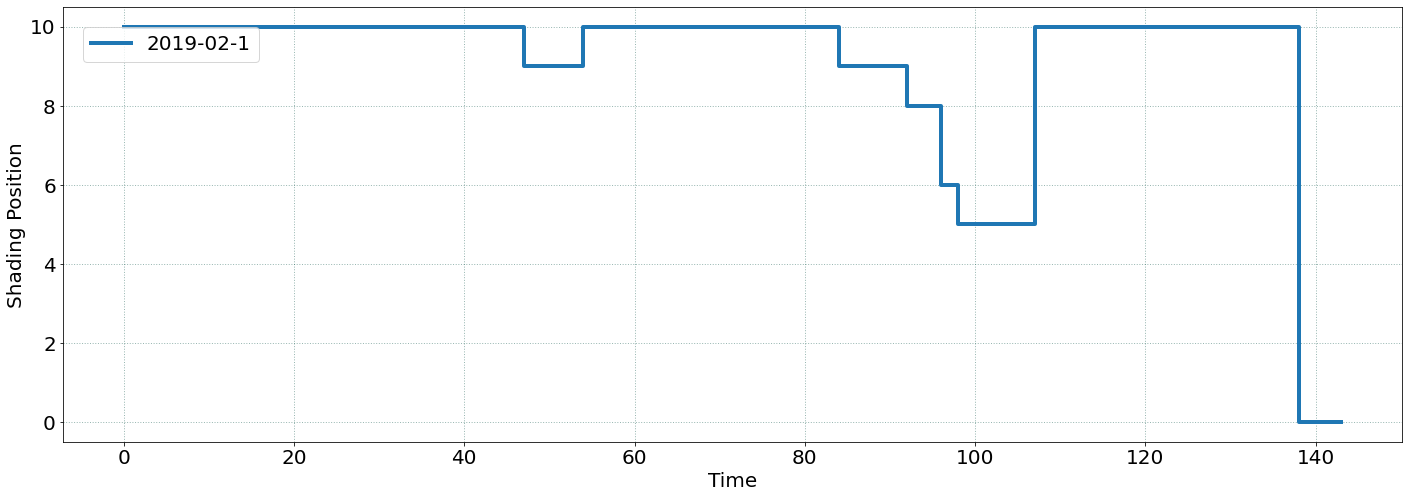

In [99]:
List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
column_names = List
Data_new['OCR%']= Data_new[column_names].sum(axis=1)
OCR = Data_new["OCR%"]

plt.figure(figsize=(24,8))
plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('Shading Position', fontsize=20)
plt.plot(OCR, lw=4 , label="2019-02-1", drawstyle='steps', markersize=21)
#plt.plot(df_HVAC , lw =2 , label= 'Zone Temp' )
#plt.plot(Actual_temp["Actual weather"] , lw =2 , label= 'temp measured' )
plt.legend(loc='upper left', borderaxespad=1,fontsize=20)

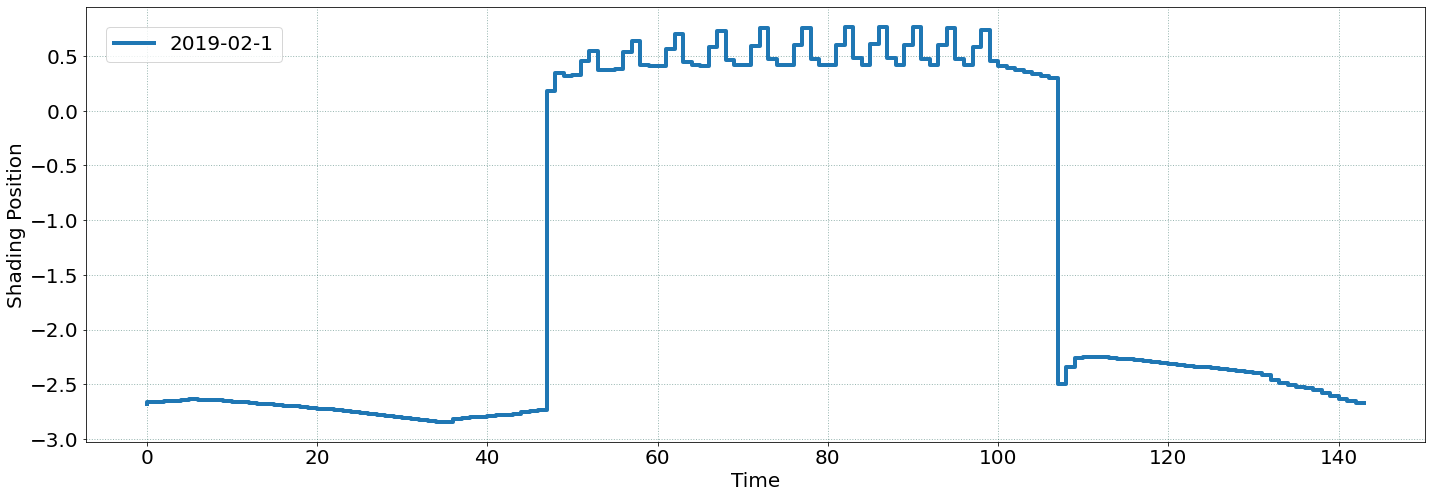

In [100]:
List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
column_names = List
Data_new['OCR%']= Data_new[column_names].sum(axis=1)
OCR = Data_new["thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,Zone Thermal Comfort Fanger Model PMV"]

plt.figure(figsize=(24,8))
plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.ylabel ('Shading Position', fontsize=20)
plt.plot(OCR, lw=4 , label="2019-02-1", drawstyle='steps', markersize=21)
#plt.plot(df_HVAC , lw =2 , label= 'Zone Temp' )
#plt.plot(Actual_temp["Actual weather"] , lw =2 , label= 'temp measured' )
plt.legend(loc='upper left', borderaxespad=1,fontsize=20)

In [103]:
Data.columns

Index(['Unnamed: 0', 'month', 'day', 'hour', 'minute', 'end_minute', 'dst',
       'day_type', 'environment,Site Outdoor Air Drybulb Temperature',
       'thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,People Occupant Count',
       'thermal zone 1,Zone Lights Electric Power',
       'thermal zone 1,Zone Lights Electric Energy',
       'thermal zone 1,Zone Windows Total Heat Gain Energy',
       'window 1,Surface Window Heat Loss Rate',
       'window 10,Surface Window Heat Loss Rate',
       'window 2,Surface Window Heat Loss Rate',
       'window 3,Surface Window Heat Loss Rate',
       'window 4,Surface Window Heat Loss Rate',
       'window 5,Surface Window Heat Loss Rate',
       'window 6,Surface Window Heat Loss Rate',
       'window 7,Surface Window Heat Loss Rate',
       'window 8,Surface Window Heat Loss Rate',
       'window 9,Surface Window Heat Loss Rate',
       'thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance',
       'therma

,Unnamed: 0,month,day,hour,minute,end_minute,dst,day_type,"environment,Site Outdoor Air Drybulb Temperature","thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,People Occupant Count",...,"always on discrete,Schedule Value","carbon equivalent:facility,Meter","carbonequivalentemissions:carbon equivalent,Meter","cooling:districtcooling,Meter","districtcooling:facility,Meter","districtcooling:hvac,Meter","districtheating:facility,Meter","districtheating:hvac,Meter","heating:districtheating,Meter",OCR%
0,2019-06-11 00:00:00,6,11,0,0,60,0,Tuesday,20.0,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
1,2019-06-11 01:00:00,6,11,1,0,60,0,Tuesday,19.3,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
2,2019-06-11 02:00:00,6,11,2,0,60,0,Tuesday,18.6,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
3,2019-06-11 03:00:00,6,11,3,0,60,0,Tuesday,18.1,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
4,2019-06-11 04:00:00,6,11,4,0,60,0,Tuesday,16.8,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
5,2019-06-11 05:00:00,6,11,5,0,60,0,Tuesday,16.3,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
6,2019-06-11 06:00:00,6,11,6,0,60,0,Tuesday,17.0,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
7,2019-06-11 07:00:00,6,11,7,0,60,0,Tuesday,19.8,0.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,10.0
8,2019-06-11 08:00:00,6,11,8,0,60,0,Tuesday,22.3,2.0,...,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,9.0
9,2019-06-11 09:00:00,6,11,9,0,60,0,Tuesday,24.3,2.0,...,1.0,0.0,0.0,3.975070e+06,3.975070e+06,3.975070e+06,0.0,0.0,0.0,9.0
